In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
def vec2dist(vec0, vec1):
    return np.hypot(vec0[0]-vec1[0], vec0[1]-vec1[1])

In [7]:
ccf_to_mri = (-1.031, 0.952, -0.885)

In [8]:
df = pd.read_csv('./data/insertionData.csv')

In [9]:
df

,Mouse,Date,En,Probe,ML,AP,DV,theta,phi,Insertion_1,Insertion_2,Insertion_3,MSE
0,ab_0003,2021-04-26,1,p1,1100,-1250,6000,90.0,0,1036.0,-1450,-193.0,209.990476
1,ab_0003,2021-04-27,1,p1,750,-1000,5100,70.0,180,961.0,-850,-318.0,258.884144
2,ab_0003,2021-05-19,1,p1,-950,1600,2550,75.0,180,-764.0,2000,-1293.0,441.130366
3,ab_0003,2021-05-20,1,p1,-2000,2300,2500,90.0,0,-1964.0,2600,-1618.0,302.152279
4,ab_0003,2021-05-21,1,p1,-800,1000,4250,90.0,0,-1039.0,1675,-1018.0,716.062846
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,ab_0024,2022-09-22,1,p0,1500,-4950,4220,80.0,-90,1761.0,-5325,-1118.0,456.887295
135,ab_0024,2022-09-27,1,p0,-520,-2300,4850,90.0,0,-739.0,-2400,-43.0,240.750909
136,ab_0024,2022-09-28,3,p0,-530,-2700,4800,90.0,0,-739.0,-2650,-93.0,214.897650
137,ab_0024,2022-09-29,1,p0,-2500,-1200,5600,85.0,0,-2839.0,-1175,-568.0,339.920579


In [14]:
ml = np.array(df['ML'].values)
ap = np.array(df['AP'].values)

In [24]:
ml = ml / ccf_to_mri[0]
ap = ap / ccf_to_mri[1]
ml_ephys = df['Insertion_1'].values
ap_ephys = df['Insertion_2'].values

In [36]:
MSE_mri = np.zeros(ml.shape)
for i in np.arange(len(ml)):
    MSE_mri[i] = vec2dist((ml[i],ap[i]), (ml_ephys[i], ap_ephys[i]))

In [37]:
MSE_ccf = df['MSE']

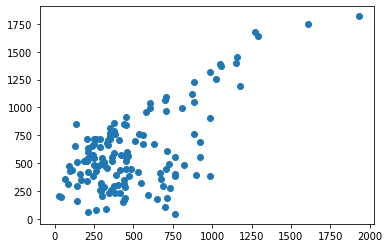

In [41]:
plt.figure()
plt.plot(MSE_ccf, MSE_mri,'o')
plt.plot([0,0],[1750,1750],'-')

In [27]:
(ml[i],ap[i])

(-2301.1169256048365, -1738.5228930919873)

In [28]:
(ml_ephys[i], ap_ephys[i])

(-2739.0, -1475)

In [29]:
np.hypot(ml[i]-ml_ephys[i], ap[i]-ap_ephys[i])

511.063500971583